In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
data = pd.read_excel("Capstone Project Data.xlsx")
df = pd.DataFrame(data)
df

,Technique,Type,Counter_Other_Attacks,Scheme,Consider_other_means_of_packet_drop,Multi_Path_Based,Acknowledge_based,Neighbor_Monitoring,Reliable_Data_Delivery
0,Karlof et's Scheme,0,1,1,0,1,1,0,1
1,Yu & Xia's,1,0,1,1,0,0,0,0
2,CHEMAS,1,0,1,1,0,0,0,0
3,SVM's,1,1,0,0,0,1,1,0
4,Hung-Min,0,0,0,0,0,1,0,1
5,Krontiris,1,1,1,0,0,1,1,0
6,Fuzzy-Based,1,0,0,0,1,1,0,1
7,2-hops Neighbor,1,0,1,1,0,1,1,0
8,CADE,1,1,0,0,0,0,0,0
9,Jeremy Brown et al,1,0,0,1,0,1,1,0


In [8]:
corr = df.corr()
#print(corr)
corr.style.background_gradient(cmap='coolwarm')
#corr.style.background_gradient(cmap='viridis').set_precision(2)

,Type,Counter_Other_Attacks,Scheme,Consider_other_means_of_packet_drop,Multi_Path_Based,Acknowledge_based,Neighbor_Monitoring,Reliable_Data_Delivery
Type,1,-0.039841,-0.127294,0.298807,-0.190476,-0.256776,0.436436,-0.378489
Counter_Other_Attacks,-0.039841,1,-0.16736,-0.416667,0.039841,0.0537086,0.16736,-0.133333
Scheme,-0.127294,-0.16736,1,0.349934,0.127294,0.032686,-0.0555556,0.0912871
Consider_other_means_of_packet_drop,0.298807,-0.416667,0.349934,1,-0.298807,-0.25064,-0.0912871,-0.416667
Multi_Path_Based,-0.190476,0.039841,0.127294,-0.298807,1,0.256776,-0.127294,0.717137
Acknowledge_based,-0.256776,0.0537086,0.032686,-0.25064,0.256776,1,0.522976,0.358057
Neighbor_Monitoring,0.436436,0.16736,-0.0555556,-0.0912871,-0.127294,0.522976,1,-0.0912871
Reliable_Data_Delivery,-0.378489,-0.133333,0.0912871,-0.416667,0.717137,0.358057,-0.0912871,1


In [5]:
df['Type'].corr(df['Reliable_Data_Delivery'])
df['Counter_Other_Attacks'].corr(df['Reliable_Data_Delivery'])

-0.13333333333333328

In [5]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(df.Type, df.Reliable_Data_Delivery))
print(jaccard_similarity_score(df.Counter_Other_Attacks, df.Reliable_Data_Delivery))
print(jaccard_similarity_score(df.Scheme, df.Reliable_Data_Delivery))
print(jaccard_similarity_score(df.Consider_other_means_of_packet_drop, df.Reliable_Data_Delivery))
print(jaccard_similarity_score(df.Multi_Path_Based, df.Reliable_Data_Delivery))
print(jaccard_similarity_score(df.Acknowledge_based, df.Reliable_Data_Delivery))
print(jaccard_similarity_score(df.Neighbor_Monitoring, df.Reliable_Data_Delivery))

0.23529411764705882
0.5294117647058824
0.5294117647058824
0.4117647058823529
0.8823529411764706
0.5294117647058824
0.47058823529411764


/home/students/nedumudi/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/home/students/nedumudi/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/home/students/nedumudi/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.

In [6]:
X = np.asarray(df[['Type','Counter_Other_Attacks','Consider_other_means_of_packet_drop','Multi_Path_Based','Acknowledge_based']])

In [7]:
y = np.asarray(df['Reliable_Data_Delivery'])

In [212]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 2.16,  0.55],
       [-0.46, -1.8 ],
       [-0.46, -1.8 ],
       [-0.46,  0.55],
       [-0.46,  0.55]])

In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (13, 5) (13,)
Test set: (4, 5) (4,)


In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [295]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0])

In [296]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.52, 0.48],
       [0.51, 0.49],
       [0.52, 0.48],
       [0.52, 0.48]])

In [297]:
!pip install --user statsmodels


You are using pip version 18.0, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [298]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.188759
         Iterations: 35
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.688    
Dependent Variable: y                AIC:              16.4178  
Date:               2019-11-22 17:02 BIC:              20.5839  
No. Observations:   17               Log-Likelihood:   -3.2089  
Df Model:           4                LL-Null:          -10.299  
Df Residuals:       12               LLR p-value:      0.0067442
Converged:          0.0000           Scale:            1.0000   
No. Iterations:     35.0000                                     
----------------------------------------------------------------
     Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
----------------------------------------------------------------
x1   -1.0561      1.5343 -0.6883 0.4912      -4.0632      1.9510
x2  -20.8101  22697.5949 -0.0009 0.9993  -44507.2786  44465.6584
x3  -26.6719 394303.2155 -0.0001 0.9999 -772846.7

/home/students/nedumudi/.local/lib/python3.5/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# EVALUATON

In [299]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.75

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

NameError: name 'yhat' is not defined

Confusion matrix, without normalization
[[0 1]
 [0 3]]


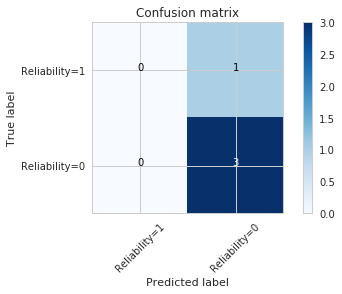

In [301]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Reliability=1','Reliability=0'],normalize= False,  title='Confusion matrix')

In [302]:
print (classification_report(y_test, yhat))


             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       0.00      0.00      0.00         1

avg / total       0.56      0.75      0.64         4



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
    from sklearn.model_selection import train_test_split
    from imblearn.under_sampling import NearMiss
    from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

    nr = NearMiss()
    X_train, y_train = nr.fit_sample(X_train, y_train)
    np.bincount(y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(y_pred)

print(confusion_matrix(y_test, y_pred))

print("accuracy = " , accuracy_score(y_test, y_pred))

print("recall = ", recall_score(y_test, y_pred))

[1 0 1 0 0]
[[3 1]
 [0 1]]
accuracy =  0.8
recall =  1.0


/home/students/nedumudi/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)
X_train, y_train

(array([[1, 0, 1, 0, 1],
        [1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1],
        [1, 1, 0, 0, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 1, 1],
        [1, 0, 0, 1, 1],
        [0, 1, 0, 1, 1]]), array([0, 0, 0, 0, 1, 1, 1, 1]))

In [308]:
np.bincount(y_train)

array([4, 4])

Confusion matrix, without normalization
[[1 0]
 [1 3]]


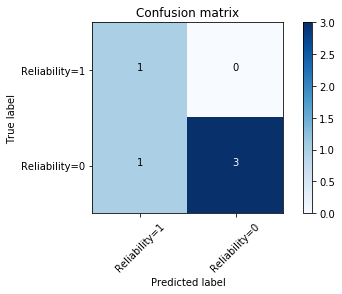

In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Reliability=1','Reliability=0'],normalize= False,  title='Confusion matrix')

In [314]:
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.75      0.86         4
          1       0.50      1.00      0.67         1

avg / total       0.90      0.80      0.82         5



In [10]:
from sklearn import linear_model
clf= linear_model.LogisticRegression(C=1e40, solver='newton-cg')
fitted_model = clf.fit(X,y)
fitted_model

LogisticRegression(C=1e+40, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predict_result = lr.predict([(1,1,1,1,1)])
predict_result

array([1])

In [20]:
print(fitted_model.intercept_)

[-10.66522059]


In [21]:
print(fitted_model.coef_)

[[-9.77834300e-09 -1.11797356e+01 -1.24571877e+01  2.20499347e+01
   1.06652206e+01]]
